In [2]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
dataset = pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


# Missing Value

In [5]:
dataset.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [6]:
dataset['CustomerID'].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [7]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [8]:
# data cleaning is required
# check duplicate value in the dataset
dataset.duplicated().sum()

3145

In [9]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [10]:
# rename the dataset columns
dataset = dataset.rename(columns={'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})
dataset.head(2)

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN


In [11]:
# Drop duplicate data from the dataset
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dataset = dataset.drop_duplicates(ignore_index=True)

In [13]:
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set


In [14]:
dataset.duplicated().sum()

0

In [15]:
dataset.isnull().sum()

CustomerID           133790
Item Code                 1
InvoiceNo                 1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [16]:
dataset = dataset.dropna(subset=['CustomerID'])

In [17]:
dataset.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [18]:
dataset.shape

(404181, 12)

In [19]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoiceNo', 'Date', 'Quantity', 'Time',
       'price per Unit', 'Price', 'Shipping Location', 'Cancelled_status',
       'Reason of return', 'Sold as set'],
      dtype='object')

In [20]:
dataset = dataset[['CustomerID','InvoiceNo','Date','Price']]

In [21]:
dataset.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  404181 non-null  float64       
 1   InvoiceNo   404181 non-null  float64       
 2   Date        404181 non-null  datetime64[ns]
 3   Price       404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [23]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [25]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [30]:
dataset['Date'].max()

Timestamp('2017-12-19 00:00:00')

In [26]:
Latest_Date = dt.datetime(2017,12,20)
Latest_Date

datetime.datetime(2017, 12, 20, 0, 0)

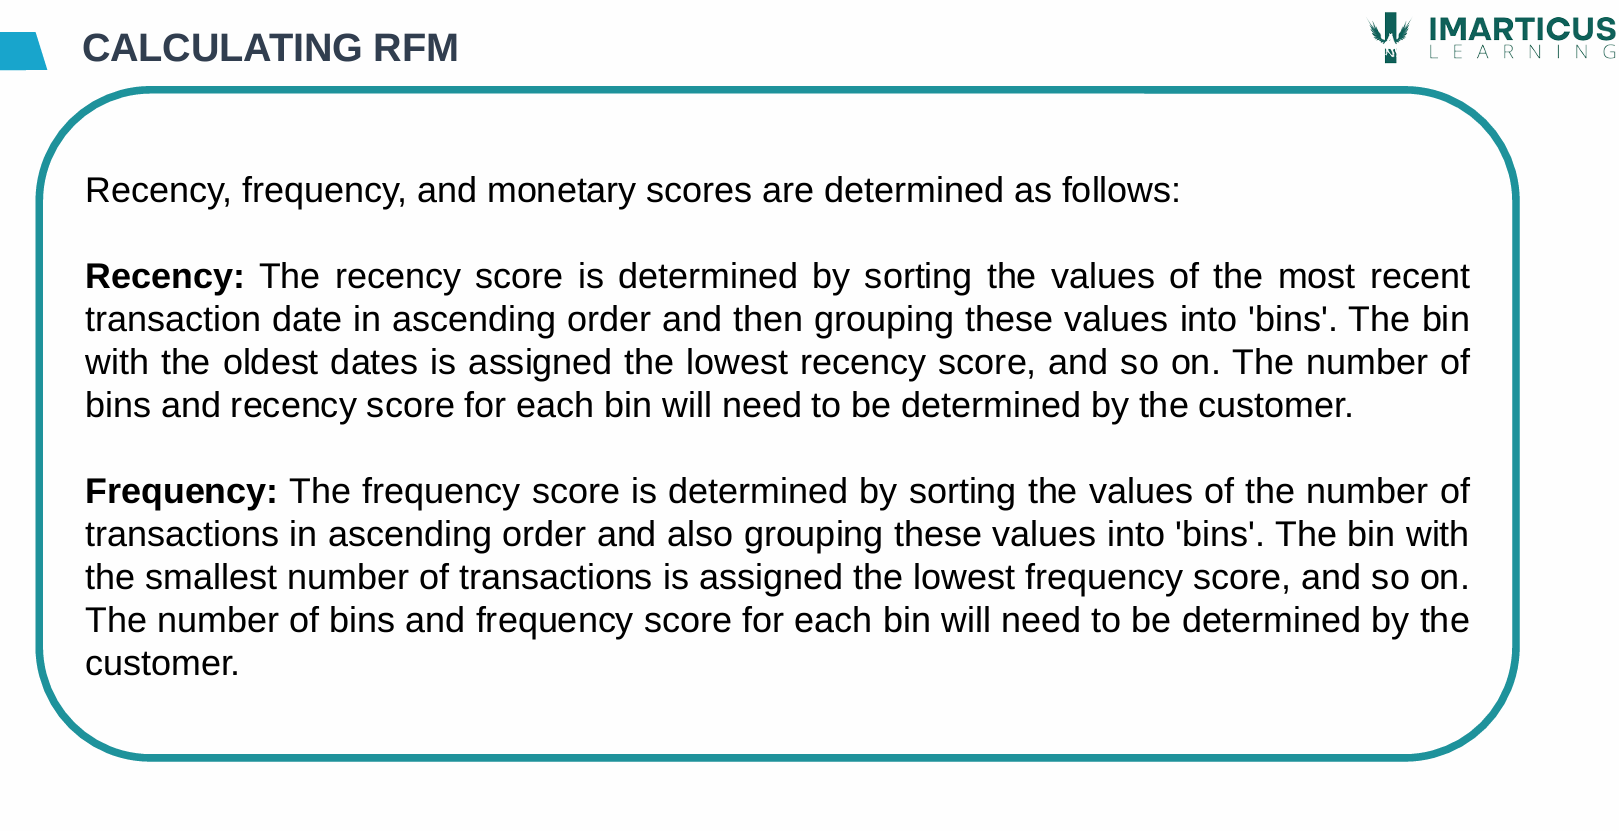

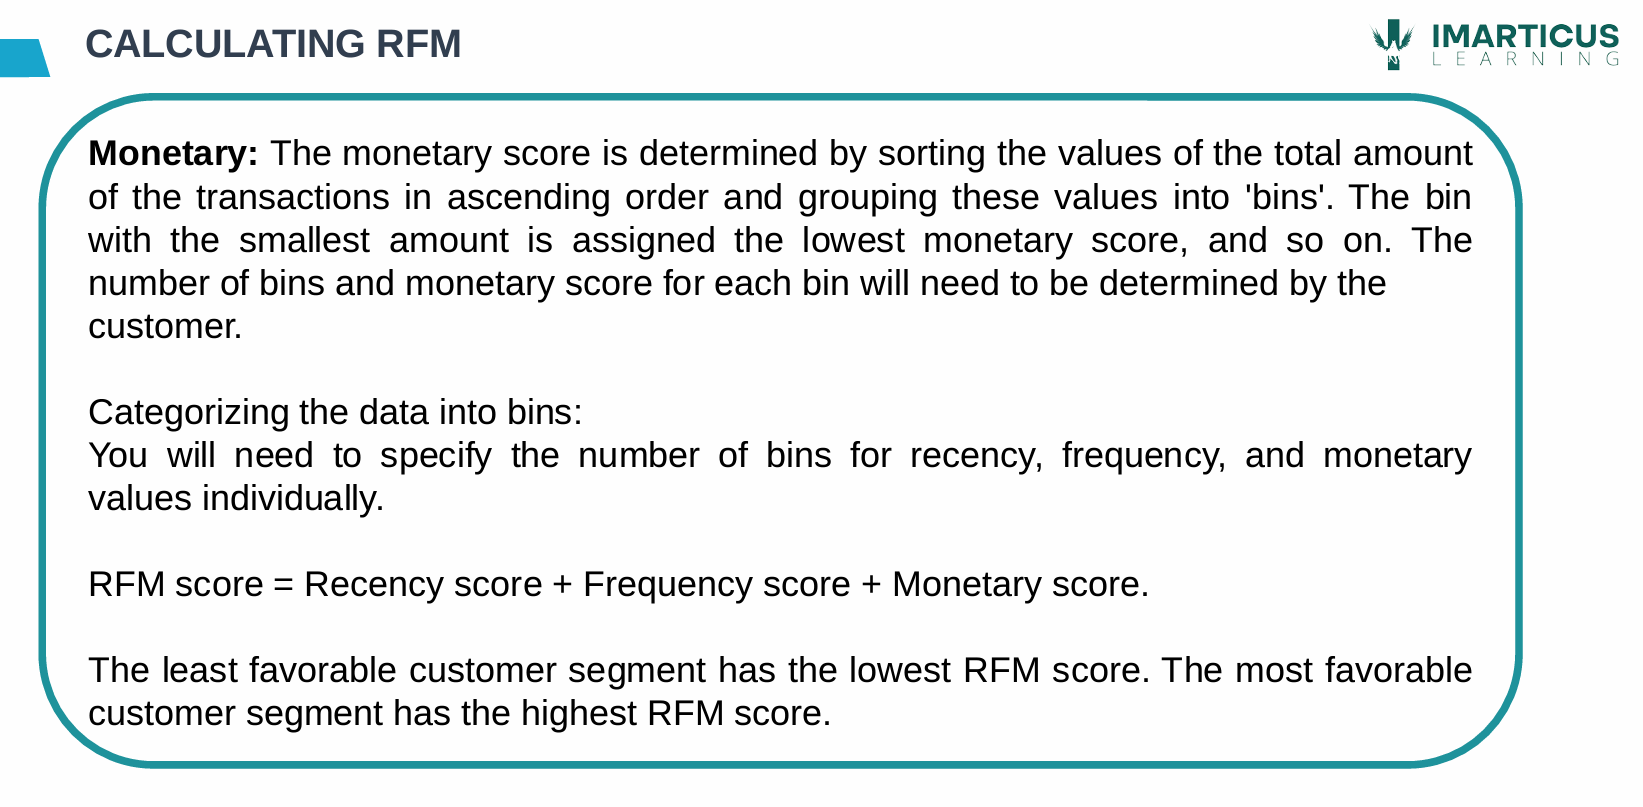

In [32]:
RMFScore = dataset.groupby('CustomerID').agg({'Date': lambda x : (Latest_Date - x.max()).days,
                                             'InvoiceNo' : lambda x : x.count(),
                                             'Price' : lambda x: x.sum()})

In [34]:
RMFScore.rename(columns={'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetory'}, 
                inplace=True)

RMFScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,754,280608.0


In [35]:
RMFScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [36]:
RMFScore.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

In [37]:
RMFScore.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [38]:
# Split into four segment using quantiles method
quantiles = RMFScore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [39]:
# defining own function to identify better customer
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4

In [40]:
RMFScore['R'] = RMFScore['Recency'].apply(RScoring, args=('Recency',quantiles,))
RMFScore

,Recency,Frequency,Monetory,R
CustomerID,,,,
2.0,4,182,553704.0,1
3.0,77,27,257404.0,4
4.0,20,72,176613.0,3
5.0,18,16,41976.0,2
6.0,9,84,151822.0,1
...,...,...,...,...
4368.0,17,10,20480.0,2
4369.0,181,7,10774.0,4
4370.0,12,13,24962.0,2


In [41]:
def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [42]:
RMFScore['F'] = RMFScore['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RMFScore['M'] = RMFScore['Monetory'].apply(FnMScoring, args=('Monetory',quantiles,))
RMFScore

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,12,13,24962.0,2,4,4


In [43]:
RMFScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [44]:
RMFScore.to_csv("MY_Client_Details.csv")

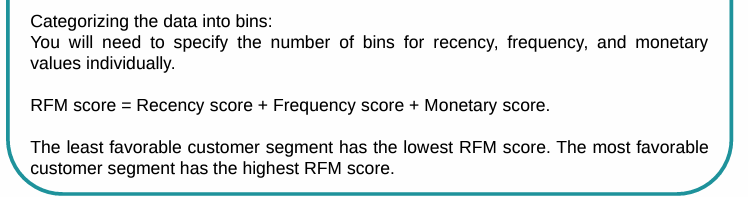

In [45]:
RMFScore['RFM_score'] = RMFScore[['R','F','M']].sum(axis=1)
RMFScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_score
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,754,280608.0,1,1,1,3


In [46]:
RMFScore['RFM_Group'] = RMFScore.R.map(str) + RMFScore.F.map(str) + RMFScore.M.map(str)
RMFScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_score,RFM_Group
0,2.0,4,182,553704.0,1,1,1,3,111
1,3.0,77,27,257404.0,4,3,1,8,431
2,4.0,20,72,176613.0,3,2,2,7,322
3,5.0,18,16,41976.0,2,4,3,9,243
4,6.0,9,84,151822.0,1,2,2,5,122
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,244
4345,4369.0,181,7,10774.0,4,4,4,12,444
4346,4370.0,12,13,24962.0,2,4,4,10,244
4347,4371.0,4,754,280608.0,1,1,1,3,111


In [47]:
RMFScore['RFM_score'].nunique()

10

In [48]:
Loyality_Level = ['Prime_Customer','Dimond_Customer','Platinum_Customer','Silver_Customer']
score_cuts = pd.qcut(RMFScore.RFM_score, q = 4, labels = Loyality_Level)
RMFScore['Loyality_Level'] = score_cuts.values
RMFScore = RMFScore.reset_index()
RMFScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_score,RFM_Group,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,3,111,Prime_Customer
1,3.0,77,27,257404.0,4,3,1,8,431,Dimond_Customer
2,4.0,20,72,176613.0,3,2,2,7,322,Dimond_Customer
3,5.0,18,16,41976.0,2,4,3,9,243,Platinum_Customer
4,6.0,9,84,151822.0,1,2,2,5,122,Prime_Customer
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,244,Platinum_Customer
4345,4369.0,181,7,10774.0,4,4,4,12,444,Silver_Customer
4346,4370.0,12,13,24962.0,2,4,4,10,244,Platinum_Customer
4347,4371.0,4,754,280608.0,1,1,1,3,111,Prime_Customer


# This is all about the manual approach
# Now, we have to use K-Means algoright to build segmentation as which customer is better basis Recency, Frequency and Monetry


In [49]:
RMFScore1 = RMFScore.iloc[:,1:4]
RMFScore1

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,754,280608.0


# Feature Scaling is required

In [52]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RMFScore1)
scaled_data = pd.DataFrame(scaled_data, index=RMFScore1.index, columns=RMFScore1.columns )
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133
...,...,...,...
4344,-0.495782,-0.357392,-0.244363
4345,1.333623,-0.370320,-0.255686
4346,-0.551556,-0.344465,-0.239134
4347,-0.640796,2.848672,0.059114


# Building K-Means Clustering


In [54]:

from sklearn.cluster import KMeans

wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=1000, random_state=1)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

In [55]:
wcss

[13047.000000000005,
 9013.070458558639,
 5554.762804279888,
 4352.8888941932855,
 3342.4890217126613,
 2476.5528493199563,
 1972.8345215608474,
 1704.5252677719282,
 1499.578526704165,
 1291.5155672113272,
 1128.2621905773815,
 1009.5689914615288,
 863.1551851394802,
 772.7236000514492]

In [56]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# By Elbow Method

<AxesSubplot:>

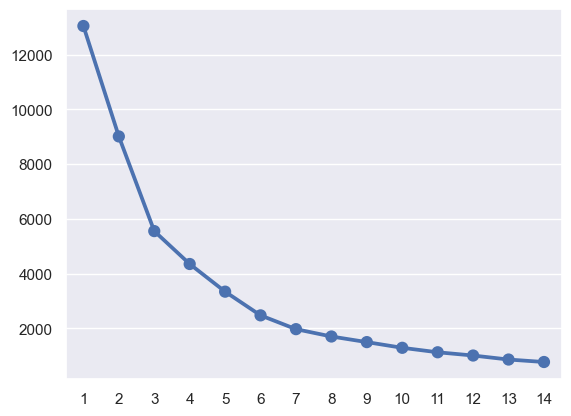

In [57]:
sns.pointplot(a, wcss)

In [62]:
KM = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
RMFScore1['Cluster'] = KM.labels_

In [64]:
RMFScore1

,Recency,Frequency,Monetory,Cluster
0,4,182,553704.0,1
1,77,27,257404.0,1
2,20,72,176613.0,1
3,18,16,41976.0,1
4,9,84,151822.0,1
...,...,...,...,...
4344,17,10,20480.0,1
4345,181,7,10774.0,0
4346,12,13,24962.0,1
4347,4,754,280608.0,1


In [65]:
RMFScore1['Cluster'].nunique()

4

In [66]:
RMFScore['Cluster'] = KM.labels_

In [67]:
RMFScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_score,RFM_Group,Loyality_Level,Cluster
0,2.0,4,182,553704.0,1,1,1,3,111,Prime_Customer,1
1,3.0,77,27,257404.0,4,3,1,8,431,Dimond_Customer,1
2,4.0,20,72,176613.0,3,2,2,7,322,Dimond_Customer,1
3,5.0,18,16,41976.0,2,4,3,9,243,Platinum_Customer,1
4,6.0,9,84,151822.0,1,2,2,5,122,Prime_Customer,1
...,...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,244,Platinum_Customer,1
4345,4369.0,181,7,10774.0,4,4,4,12,444,Silver_Customer,0
4346,4370.0,12,13,24962.0,2,4,4,10,244,Platinum_Customer,1
4347,4371.0,4,754,280608.0,1,1,1,3,111,Prime_Customer,1


In [68]:
centroid_df = RMFScore.groupby('Loyality_Level')[['Recency','Frequency', 'Monetory', 'CustomerID']].agg({
    
    'Recency':'sum', 'Frequency':'sum', 'Monetory':'sum', 'CustomerID':'nunique'}).reset_index()

In [69]:
centroid_df

,Loyality_Level,Recency,Frequency,Monetory,CustomerID
0,Prime_Customer,13362,298399,767633043.0,1310
1,Dimond_Customer,41948,73971,160208072.0,1287
2,Platinum_Customer,78894,23639,52805957.1,939
3,Silver_Customer,133021,8172,19353275.0,813


In [73]:
centroid_df['Percentage'] = round(centroid_df['CustomerID'] / centroid_df.CustomerID.sum()*100,2)

In [70]:
centroid_df.CustomerID.sum()

4349

In [71]:
centroid_df['CustomerID'] 

0    1310
1    1287
2     939
3     813
Name: CustomerID, dtype: int64

In [74]:
centroid_df

,Loyality_Level,Recency,Frequency,Monetory,CustomerID,Percentage
0,Prime_Customer,13362,298399,767633043.0,1310,30.12
1,Dimond_Customer,41948,73971,160208072.0,1287,29.59
2,Platinum_Customer,78894,23639,52805957.1,939,21.59
3,Silver_Customer,133021,8172,19353275.0,813,18.69


In [75]:
centroid_df1 = centroid_df[['Loyality_Level','CustomerID','Percentage']]
centroid_df1

,Loyality_Level,CustomerID,Percentage
0,Prime_Customer,1310,30.12
1,Dimond_Customer,1287,29.59
2,Platinum_Customer,939,21.59
3,Silver_Customer,813,18.69


# Here through our analysis we came to the conclusion that 
## We have 30.12% of Prime Customers, where we can give them lots of Marketing Discount as they are our best customers
## We have 29.59% of Daimond Customers, same we can give them Discounts and Marketing Facilities and stive them up to Prime Customer
## We have 21.59% of Plattinum Customers, where they do not belong to any of the category, so we should encourage them to invest more, with Discount on their Purchase,and by providing Vouchers etc
##  and there are about 18.69% of Customers who are Silver Customers, generally considered as least investing or buying Customer, We should also try and boost them,to buy or purchase Products Frequently

In [76]:
#!pip install squarify
import squarify

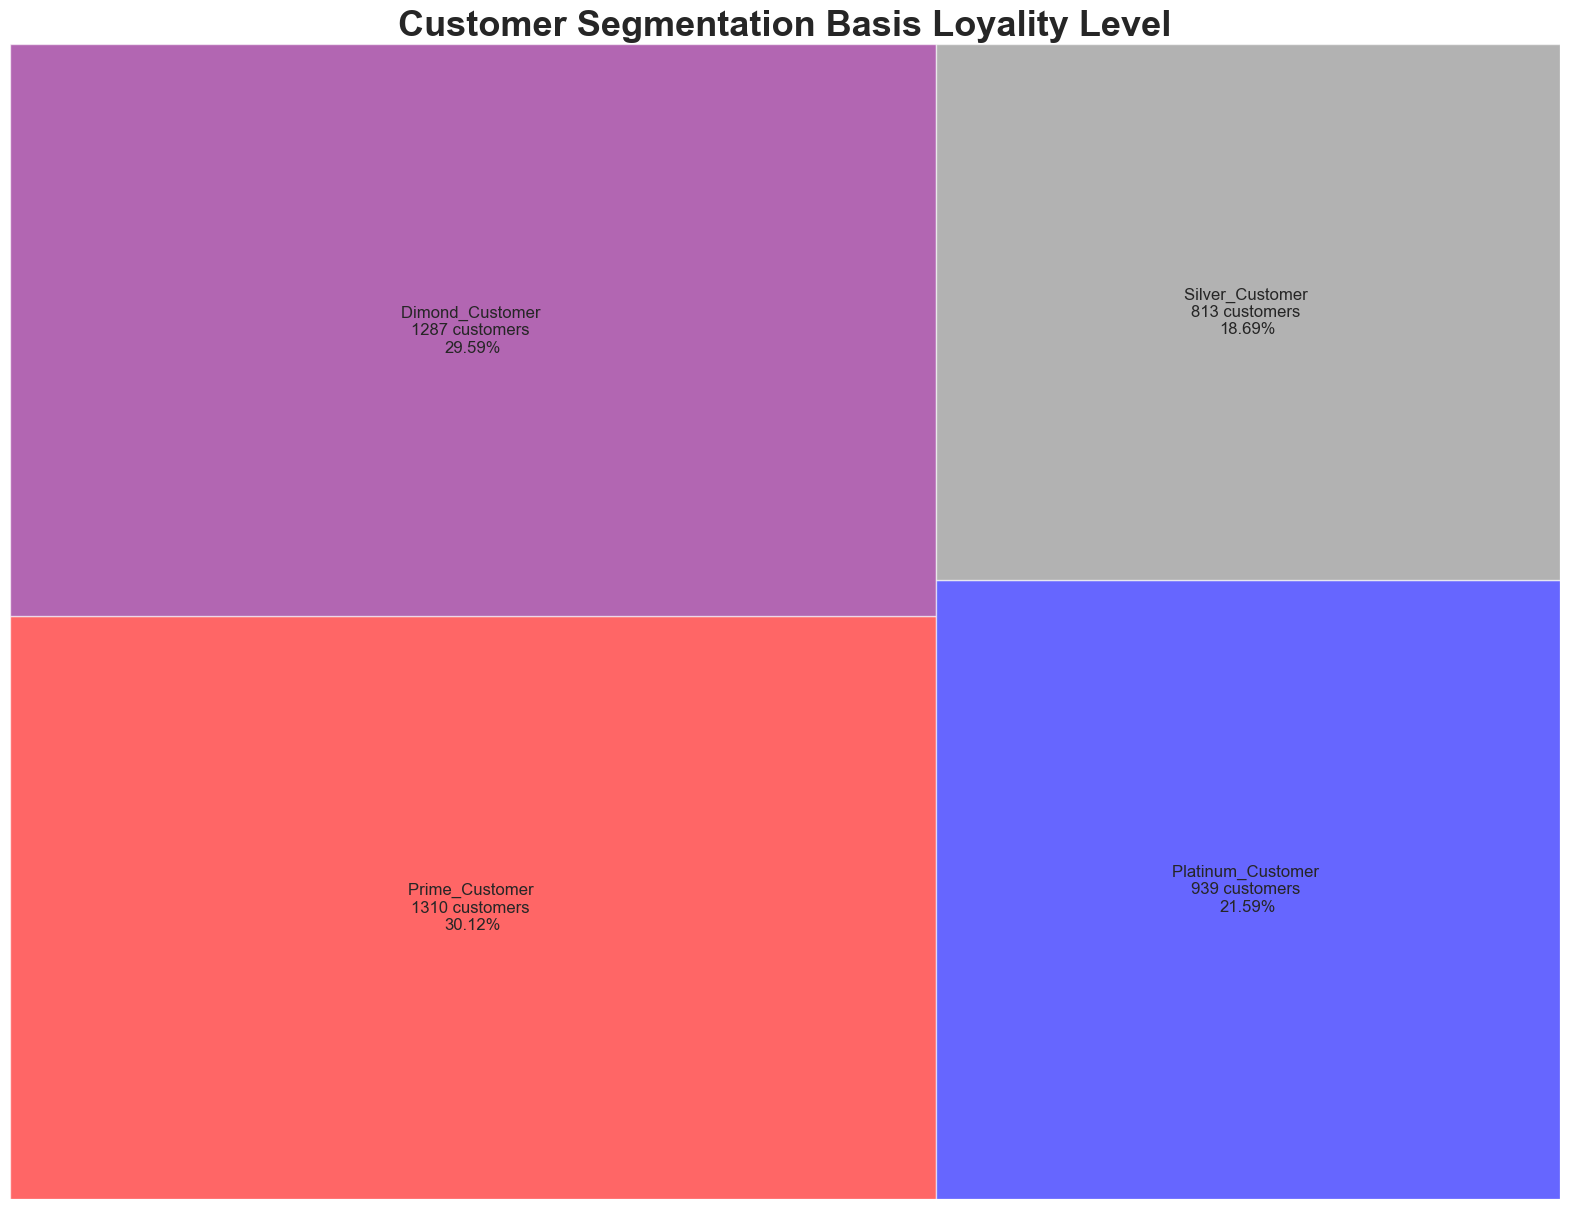

In [79]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)

colors_dics = {'Prime_Customer' : 'red','Dimond_Customer':'Purple', 'Platinum_Customer':'blue','Silver_Customer':'gray'}

squarify.plot(sizes = centroid_df1['CustomerID'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n{}%'.format(*centroid_df1.iloc[i]) for i in range(0,len(centroid_df1))],
             alpha=0.6)
plt.title("Customer Segmentation Basis Loyality Level", fontsize=26, fontweight='bold')
plt.axis('off')
plt.show()